In [203]:
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
df = pd.read_csv('data.csv')

In [116]:
df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [117]:
temp = pd.concat([df.dtypes, df.apply(lambda col: len(col.unique()))], axis=1)
temp.head()

,0,1
regio1,object,16
serviceCharge,float64,12267
heatingType,object,14
telekomTvOffer,object,4
telekomHybridUploadSpeed,float64,2


In [118]:
temp[temp[0] == object]

,0,1
regio1,object,16
heatingType,object,14
telekomTvOffer,object,4
firingTypes,object,133
geo_bln,object,16
houseNumber,object,5511
geo_krs,object,419
condition,object,11
interiorQual,object,5
petsAllowed,object,4


In [119]:
pd.concat([df.facilities, df.description, df.regio2, df.regio3, df.streetPlain, df.street, df.geo_krs, df.houseNumber, df.firingTypes], 1).head(3)

,facilities,description,regio2,regio3,streetPlain,street,geo_krs,houseNumber,firingTypes
0,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,Die ebenerdig zu erreichende Erdgeschosswohnun...,Dortmund,Schüren,Schüruferstraße,Sch&uuml;ruferstra&szlig;e,Dortmund,244,oil
1,NaN,Alles neu macht der Mai – so kann es auch für ...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,NaN,no_information,Rhein_Pfalz_Kreis,NaN,gas
2,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",Der Neubau entsteht im Herzen der Dresdner Neu...,Dresden,Äußere_Neustadt_Antonstadt,Turnerweg,Turnerweg,Dresden,4,NaN


In [120]:
df = df.drop(['regio3','description', 'facilities', 'streetPlain', 'street', 'houseNumber'], 1)

In [121]:
temp = pd.concat([df.dtypes, df.apply(lambda col: len(col.unique()))], axis=1)
temp[temp[0] == object]

,0,1
regio1,object,16
heatingType,object,14
telekomTvOffer,object,4
firingTypes,object,133
geo_bln,object,16
geo_krs,object,419
condition,object,11
interiorQual,object,5
petsAllowed,object,4
typeOfFlat,object,11


In [122]:
(df.geo_krs == df.regio2).all()

True

In [123]:
df = df.drop(['regio2'], 1)

In [124]:
temp = pd.concat([df.dtypes, df.apply(lambda col: len(col.unique()))], axis=1)
temp[temp[0] == object]

,0,1
regio1,object,16
heatingType,object,14
telekomTvOffer,object,4
firingTypes,object,133
geo_bln,object,16
geo_krs,object,419
condition,object,11
interiorQual,object,5
petsAllowed,object,4
typeOfFlat,object,11


# NULLS

In [125]:
def missing(dff):
    return (round((dff.isnull().sum() * 100/ len(dff)),10).to_frame())

mis_values = missing(df)
mis_values.columns = ["Missing in %"]
enhanced_miss = pd.concat([pd.concat([df.isnull().all(),df.isnull().any()], 1).rename(columns={0: "all", 1: 'any'}),mis_values], 1)

In [126]:
enhanced_miss[enhanced_miss['Missing in %'] >50]

,all,any,Missing in %
telekomHybridUploadSpeed,False,True,83.254603
noParkSpaces,False,True,65.388879
heatingCosts,False,True,68.191185
energyEfficiencyClass,False,True,71.066766
lastRefurbish,False,True,69.979171
electricityBasePrice,False,True,82.575414
electricityKwhPrice,False,True,82.575414


In [127]:
enhanced_miss[enhanced_miss['Missing in %'] >10]

,all,any,Missing in %
heatingType,False,True,16.684397
telekomTvOffer,False,True,12.132788
telekomHybridUploadSpeed,False,True,83.254603
telekomUploadSpeed,False,True,12.407662
totalRent,False,True,15.070485
yearConstructed,False,True,21.218151
noParkSpaces,False,True,65.388879
firingTypes,False,True,21.188023
yearConstructedRange,False,True,21.218151
condition,False,True,25.474800


In [129]:
pd.concat([enhanced_miss, temp], 1)[pd.concat([enhanced_miss, temp], 1)['Missing in %'] > 0.1]

,all,any,Missing in %,0,1
serviceCharge,False,True,2.569834,float64,12267
heatingType,False,True,16.684397,object,14
telekomTvOffer,False,True,12.132788,object,4
telekomHybridUploadSpeed,False,True,83.254603,float64,2
pricetrend,False,True,0.681421,float64,1235
telekomUploadSpeed,False,True,12.407662,float64,8
totalRent,False,True,15.070485,float64,28487
yearConstructed,False,True,21.218151,float64,466
noParkSpaces,False,True,65.388879,float64,72
firingTypes,False,True,21.188023,object,133


In [130]:
list(enhanced_miss[enhanced_miss['Missing in %'] >20].index)

['telekomHybridUploadSpeed',
 'yearConstructed',
 'noParkSpaces',
 'firingTypes',
 'yearConstructedRange',
 'condition',
 'interiorQual',
 'petsAllowed',
 'thermalChar',
 'numberOfFloors',
 'heatingCosts',
 'energyEfficiencyClass',
 'lastRefurbish',
 'electricityBasePrice',
 'electricityKwhPrice']

In [131]:
to_drop = ['telekomHybridUploadSpeed',
 'yearConstructed',
 'noParkSpaces',
 'yearConstructedRange',
 'condition',
 'interiorQual',
 'petsAllowed',
 'thermalChar',
 'numberOfFloors',
 'heatingCosts',
 'energyEfficiencyClass',
 'lastRefurbish',
 'electricityBasePrice',
 'electricityKwhPrice']

In [132]:
df = df.drop(to_drop, 1)

In [133]:
len(df)

268850

In [134]:
len(df.dropna())

108790

In [139]:
mis_values = missing(df)
mis_values.columns = ["Missing in %"]
enhanced_miss = pd.concat([pd.concat([df.isnull().all(),df.isnull().any()], 1).rename(columns={0: "all", 1: 'any'}),mis_values], 1)

In [141]:
temp = pd.concat([df.dtypes, df.apply(lambda col: len(col.unique()))], axis=1)

In [140]:
pd.concat([enhanced_miss, temp], 1)[pd.concat([enhanced_miss, temp], 1)['Missing in %'] > 0.1]

,all,any,Missing in %,0,1
serviceCharge,False,True,2.569834,float64,12267
heatingType,False,True,16.684397,object,14
telekomTvOffer,False,True,12.132788,object,4
pricetrend,False,True,0.681421,float64,1235
telekomUploadSpeed,False,True,12.407662,float64,8
totalRent,False,True,15.070485,float64,28487
firingTypes,False,True,21.188023,object,133
typeOfFlat,False,True,13.618747,object,11
floor,False,True,19.084620,float64,54


In [150]:
df = df.drop(['floor', 'heatingType', 'telekomUploadSpeed', 'telekomTvOffer'], 1)

In [151]:
len(df)

268850

In [152]:
len(df.dropna())

155700

In [153]:
155700 / 268850

0.5791333457318207

In [154]:
mis_values = missing(df)
mis_values.columns = ["Missing in %"]
enhanced_miss = pd.concat([pd.concat([df.isnull().all(),df.isnull().any()], 1).rename(columns={0: "all", 1: 'any'}),mis_values], 1)
temp = pd.concat([df.dtypes, df.apply(lambda col: len(col.unique()))], axis=1)
pd.concat([enhanced_miss, temp], 1)[pd.concat([enhanced_miss, temp], 1)['Missing in %'] > 0.1]

,all,any,Missing in %,0,1
serviceCharge,False,True,2.569834,float64,12267
pricetrend,False,True,0.681421,float64,1235
totalRent,False,True,15.070485,float64,28487
firingTypes,False,True,21.188023,object,133
typeOfFlat,False,True,13.618747,object,11


In [430]:
df2 = df.drop(['typeOfFlat'], 1)

In [158]:
len(df2.dropna())

176907

In [159]:
176907/268850

0.6580137623209968

In [431]:
df2 = df2.dropna()

# Cleaning

In [432]:
df2.columns

Index(['regio1', 'serviceCharge', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'totalRent', 'scoutId', 'firingTypes', 'hasKitchen',
       'geo_bln', 'cellar', 'baseRent', 'livingSpace', 'geo_krs', 'lift',
       'baseRentRange', 'geo_plz', 'noRooms', 'noRoomsRange', 'garden',
       'livingSpaceRange', 'date'],
      dtype='object')

In [433]:
df2.drop(['date'], 1, inplace = True)

In [330]:
df2.drop(['geo_plz'], 1, inplace = True)

In [434]:
df2.drop(['geo_bln'], 1, inplace = True)

In [435]:
df2 = df2.drop(df2[df2.totalRent > 5000].index)

In [436]:
df2.drop(df2[df2.totalRent < 100].index, inplace = True)

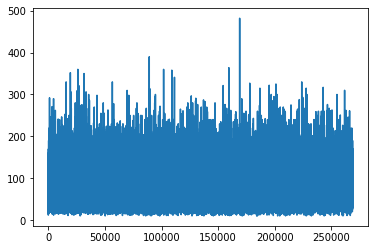

In [437]:
plt.plot(df2.livingSpace)

In [438]:
df2.drop(df2[df2.livingSpace >2000].index,inplace = True)
df2.drop(df2[df2.livingSpace < 10].index, inplace= True)

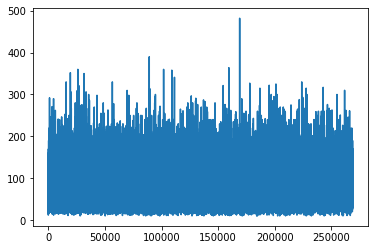

In [439]:
plt.plot(df2.livingSpace)

In [440]:
df2.drop(['baseRent'], 1, inplace = True)

In [441]:
df2.drop(['scoutId'],1, inplace = True)

In [442]:
df2.drop(df2[df2.totalRent < 80].index, inplace = True)

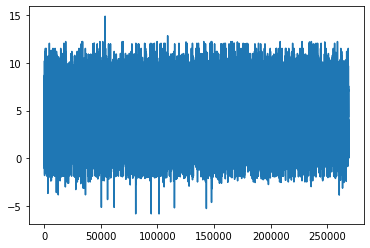

In [443]:
plt.plot(df2.pricetrend)

In [444]:
df2.drop(df2[df2.pricetrend < -6].index,inplace = True)

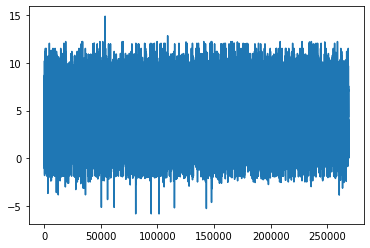

In [445]:
plt.plot(df2.pricetrend)

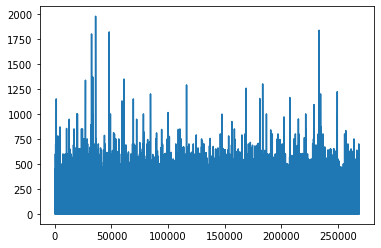

In [446]:
plt.plot(df2.serviceCharge)

In [447]:
df2 = df2.drop(df2[df2.serviceCharge > 2000].index)

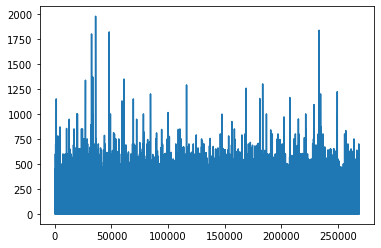

In [448]:
plt.plot(df2.serviceCharge)

In [449]:
df2.noRooms.unique()

array([4, 3, 2, 1, 5, 6, 7], dtype=int64)

In [450]:
df2.drop(df2[df2.noRooms > 7].index, inplace = True)

In [451]:
df2.noRooms = df2.noRooms.apply(int)

In [452]:
rent = df2.totalRent
df2.drop(['totalRent'], 1, inplace = True)
df2['totalRent'] = rent

In [453]:
df2.reset_index(drop = True, inplace = True)

# Partitioning


In [456]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176285 entries, 0 to 176284
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   regio1            176285 non-null  object 
 1   serviceCharge     176285 non-null  float64
 2   newlyConst        176285 non-null  bool   
 3   balcony           176285 non-null  bool   
 4   picturecount      176285 non-null  int64  
 5   pricetrend        176285 non-null  float64
 6   firingTypes       176285 non-null  object 
 7   hasKitchen        176285 non-null  bool   
 8   cellar            176285 non-null  bool   
 9   livingSpace       176285 non-null  float64
 10  geo_krs           176285 non-null  object 
 11  lift              176285 non-null  bool   
 12  baseRentRange     176285 non-null  int64  
 13  geo_plz           176285 non-null  int64  
 14  noRooms           176285 non-null  int64  
 15  noRoomsRange      176285 non-null  int64  
 16  garden            17

In [457]:
temp = pd.concat([df2.dtypes, df2.apply(lambda col: len(col.unique()))], axis=1)
temp

,0,1
regio1,object,16
serviceCharge,float64,8991
newlyConst,bool,2
balcony,bool,2
picturecount,int64,87
pricetrend,float64,1186
firingTypes,object,116
hasKitchen,bool,2
cellar,bool,2
livingSpace,float64,11573


In [396]:
list(temp[(temp[0] == 'int64') | (temp[0] == 'float64') ].index)

['serviceCharge',
 'picturecount',
 'pricetrend',
 'livingSpace',
 'baseRentRange',
 'noRooms',
 'noRoomsRange',
 'livingSpaceRange',
 'totalRent']

In [397]:
df_smallest = df2[temp[(temp[0] == 'int64') | (temp[0] == 'float64') ].index]

In [398]:
df_smallest

,serviceCharge,picturecount,pricetrend,livingSpace,baseRentRange,noRooms,noRoomsRange,livingSpaceRange,totalRent
0,245.0,6,4.62,86.00,4,4,4,4,840.00
1,138.0,19,2.46,84.97,5,3,3,4,903.00
2,88.0,5,1.89,60.30,3,3,3,2,584.25
3,110.0,5,3.77,53.00,4,2,2,2,690.00
4,88.0,11,0.21,40.20,1,2,2,1,307.00
...,...,...,...,...,...,...,...,...,...
176280,80.0,12,2.58,85.00,4,3,3,4,670.00
176281,90.0,0,2.74,90.00,6,3,3,4,910.00
176282,220.0,12,6.49,115.00,6,3,3,5,1150.00
176283,220.0,21,2.90,95.00,5,4,4,4,930.00


In [399]:
df_smallest_10k_8features = df_smallest.sample(n = 10000)

In [400]:
df_smallest_176k_8features = df_smallest.copy()

In [401]:
df_small = df2[temp[(temp[0] == 'int64') | (temp[0] == 'float64') | (temp[0] == 'bool')].index]

In [402]:
df_small

,serviceCharge,newlyConst,balcony,picturecount,pricetrend,hasKitchen,cellar,livingSpace,lift,baseRentRange,noRooms,noRoomsRange,garden,livingSpaceRange,totalRent
0,245.0,False,False,6,4.62,False,True,86.00,False,4,4,4,True,4,840.00
1,138.0,False,True,19,2.46,False,False,84.97,False,5,3,3,False,4,903.00
2,88.0,False,True,5,1.89,False,True,60.30,False,3,3,3,False,2,584.25
3,110.0,False,False,5,3.77,True,True,53.00,False,4,2,2,False,2,690.00
4,88.0,False,True,11,0.21,False,True,40.20,False,1,2,2,False,1,307.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176280,80.0,False,False,12,2.58,False,False,85.00,False,4,3,3,False,4,670.00
176281,90.0,False,True,0,2.74,False,True,90.00,False,6,3,3,False,4,910.00
176282,220.0,False,True,12,6.49,True,False,115.00,False,6,3,3,False,5,1150.00
176283,220.0,False,True,21,2.90,False,True,95.00,False,5,4,4,True,4,930.00


In [403]:
pd.get_dummies(df_small.garden, prefix ='garden')

,garden_False,garden_True
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
176280,1,0
176281,1,0
176282,1,0
176283,0,1


In [404]:
one_hot = pd.get_dummies(df_small.garden, prefix ='garden')
df_small = df_small.drop('garden',axis = 1)
df_small = df_small.join(one_hot)

In [405]:
one_hot = pd.get_dummies(df_small.lift, prefix ='lift')
df_small = df_small.drop('lift',axis = 1)
df_small = df_small.join(one_hot)

one_hot = pd.get_dummies(df_small.hasKitchen, prefix ='hasKitchen')
df_small = df_small.drop('hasKitchen',axis = 1)
df_small = df_small.join(one_hot)

one_hot = pd.get_dummies(df_small.cellar, prefix ='cellar')
df_small = df_small.drop('cellar',axis = 1)
df_small = df_small.join(one_hot)

one_hot = pd.get_dummies(df_small.balcony, prefix ='balcony')
df_small = df_small.drop('balcony',axis = 1)
df_small = df_small.join(one_hot)

one_hot = pd.get_dummies(df_small.newlyConst, prefix ='newlyConst')
df_small = df_small.drop('newlyConst',axis = 1)
df_small = df_small.join(one_hot)

In [406]:
df_small

,serviceCharge,picturecount,pricetrend,livingSpace,baseRentRange,noRooms,noRoomsRange,livingSpaceRange,totalRent,garden_False,...,lift_False,lift_True,hasKitchen_False,hasKitchen_True,cellar_False,cellar_True,balcony_False,balcony_True,newlyConst_False,newlyConst_True
0,245.0,6,4.62,86.00,4,4,4,4,840.00,0,...,1,0,1,0,0,1,1,0,1,0
1,138.0,19,2.46,84.97,5,3,3,4,903.00,1,...,1,0,1,0,1,0,0,1,1,0
2,88.0,5,1.89,60.30,3,3,3,2,584.25,1,...,1,0,1,0,0,1,0,1,1,0
3,110.0,5,3.77,53.00,4,2,2,2,690.00,1,...,1,0,0,1,0,1,1,0,1,0
4,88.0,11,0.21,40.20,1,2,2,1,307.00,1,...,1,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176280,80.0,12,2.58,85.00,4,3,3,4,670.00,1,...,1,0,1,0,1,0,1,0,1,0
176281,90.0,0,2.74,90.00,6,3,3,4,910.00,1,...,1,0,1,0,0,1,0,1,1,0
176282,220.0,12,6.49,115.00,6,3,3,5,1150.00,1,...,1,0,0,1,1,0,0,1,1,0
176283,220.0,21,2.90,95.00,5,4,4,4,930.00,0,...,1,0,1,0,0,1,0,1,1,0


In [407]:
rent = df_small.totalRent
df_small.drop(['totalRent'], 1, inplace = True)
df_small['totalRent'] = rent
df_small

,serviceCharge,picturecount,pricetrend,livingSpace,baseRentRange,noRooms,noRoomsRange,livingSpaceRange,garden_False,garden_True,...,lift_True,hasKitchen_False,hasKitchen_True,cellar_False,cellar_True,balcony_False,balcony_True,newlyConst_False,newlyConst_True,totalRent
0,245.0,6,4.62,86.00,4,4,4,4,0,1,...,0,1,0,0,1,1,0,1,0,840.00
1,138.0,19,2.46,84.97,5,3,3,4,1,0,...,0,1,0,1,0,0,1,1,0,903.00
2,88.0,5,1.89,60.30,3,3,3,2,1,0,...,0,1,0,0,1,0,1,1,0,584.25
3,110.0,5,3.77,53.00,4,2,2,2,1,0,...,0,0,1,0,1,1,0,1,0,690.00
4,88.0,11,0.21,40.20,1,2,2,1,1,0,...,0,1,0,0,1,0,1,1,0,307.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176280,80.0,12,2.58,85.00,4,3,3,4,1,0,...,0,1,0,1,0,1,0,1,0,670.00
176281,90.0,0,2.74,90.00,6,3,3,4,1,0,...,0,1,0,0,1,0,1,1,0,910.00
176282,220.0,12,6.49,115.00,6,3,3,5,1,0,...,0,0,1,1,0,0,1,1,0,1150.00
176283,220.0,21,2.90,95.00,5,4,4,4,0,1,...,0,1,0,0,1,0,1,1,0,930.00


In [408]:
df_30k_20features = df_small.sample(n = 30000)
df_90k_20features = df_small.sample(n = 90000)
df_176k_20features = df_small.copy()

In [409]:
df_176k_20features

,serviceCharge,picturecount,pricetrend,livingSpace,baseRentRange,noRooms,noRoomsRange,livingSpaceRange,garden_False,garden_True,...,lift_True,hasKitchen_False,hasKitchen_True,cellar_False,cellar_True,balcony_False,balcony_True,newlyConst_False,newlyConst_True,totalRent
0,245.0,6,4.62,86.00,4,4,4,4,0,1,...,0,1,0,0,1,1,0,1,0,840.00
1,138.0,19,2.46,84.97,5,3,3,4,1,0,...,0,1,0,1,0,0,1,1,0,903.00
2,88.0,5,1.89,60.30,3,3,3,2,1,0,...,0,1,0,0,1,0,1,1,0,584.25
3,110.0,5,3.77,53.00,4,2,2,2,1,0,...,0,0,1,0,1,1,0,1,0,690.00
4,88.0,11,0.21,40.20,1,2,2,1,1,0,...,0,1,0,0,1,0,1,1,0,307.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176280,80.0,12,2.58,85.00,4,3,3,4,1,0,...,0,1,0,1,0,1,0,1,0,670.00
176281,90.0,0,2.74,90.00,6,3,3,4,1,0,...,0,1,0,0,1,0,1,1,0,910.00
176282,220.0,12,6.49,115.00,6,3,3,5,1,0,...,0,0,1,1,0,0,1,1,0,1150.00
176283,220.0,21,2.90,95.00,5,4,4,4,0,1,...,0,1,0,0,1,0,1,1,0,930.00


In [413]:
df_small = df_small.join(df2.regio1)firingTypes

In [414]:
one_hot = pd.get_dummies(df_small.regio1, prefix ='regio1')
df_small = df_small.drop('regio1',axis = 1)
df_small = df_small.join(one_hot)

In [415]:
df_small

,serviceCharge,picturecount,pricetrend,livingSpace,baseRentRange,noRooms,noRoomsRange,livingSpaceRange,garden_False,garden_True,...,regio1_Hessen,regio1_Mecklenburg_Vorpommern,regio1_Niedersachsen,regio1_Nordrhein_Westfalen,regio1_Rheinland_Pfalz,regio1_Saarland,regio1_Sachsen,regio1_Sachsen_Anhalt,regio1_Schleswig_Holstein,regio1_Thüringen
0,245.0,6,4.62,86.00,4,4,4,4,0,1,...,0,0,0,1,0,0,0,0,0,0
1,138.0,19,2.46,84.97,5,3,3,4,1,0,...,0,0,0,0,0,0,0,0,0,0
2,88.0,5,1.89,60.30,3,3,3,2,1,0,...,0,0,0,0,0,0,0,0,0,0
3,110.0,5,3.77,53.00,4,2,2,2,1,0,...,0,0,0,0,0,0,0,0,0,0
4,88.0,11,0.21,40.20,1,2,2,1,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176280,80.0,12,2.58,85.00,4,3,3,4,1,0,...,0,0,0,1,0,0,0,0,0,0
176281,90.0,0,2.74,90.00,6,3,3,4,1,0,...,0,0,0,0,0,0,0,0,0,0
176282,220.0,12,6.49,115.00,6,3,3,5,1,0,...,1,0,0,0,0,0,0,0,0,0
176283,220.0,21,2.90,95.00,5,4,4,4,0,1,...,1,0,0,0,0,0,0,0,0,0


In [416]:
rent = df_small.totalRent
df_small.drop(['totalRent'], 1, inplace = True)
df_small['totalRent'] = rent
df_small

,serviceCharge,picturecount,pricetrend,livingSpace,baseRentRange,noRooms,noRoomsRange,livingSpaceRange,garden_False,garden_True,...,regio1_Mecklenburg_Vorpommern,regio1_Niedersachsen,regio1_Nordrhein_Westfalen,regio1_Rheinland_Pfalz,regio1_Saarland,regio1_Sachsen,regio1_Sachsen_Anhalt,regio1_Schleswig_Holstein,regio1_Thüringen,totalRent
0,245.0,6,4.62,86.00,4,4,4,4,0,1,...,0,0,1,0,0,0,0,0,0,840.00
1,138.0,19,2.46,84.97,5,3,3,4,1,0,...,0,0,0,0,0,0,0,0,0,903.00
2,88.0,5,1.89,60.30,3,3,3,2,1,0,...,0,0,0,0,0,0,0,0,0,584.25
3,110.0,5,3.77,53.00,4,2,2,2,1,0,...,0,0,0,0,0,0,0,0,0,690.00
4,88.0,11,0.21,40.20,1,2,2,1,1,0,...,0,0,0,0,0,1,0,0,0,307.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176280,80.0,12,2.58,85.00,4,3,3,4,1,0,...,0,0,1,0,0,0,0,0,0,670.00
176281,90.0,0,2.74,90.00,6,3,3,4,1,0,...,0,0,0,0,0,0,0,0,0,910.00
176282,220.0,12,6.49,115.00,6,3,3,5,1,0,...,0,0,0,0,0,0,0,0,0,1150.00
176283,220.0,21,2.90,95.00,5,4,4,4,0,1,...,0,0,0,0,0,0,0,0,0,930.00


In [417]:
df_30k_36features = df_small.sample(n = 30000)
df_90k_36features = df_small.sample(n = 90000)
df_176k_36features = df_small.copy()

In [419]:
df_small = df_small.join(df2.firingTypes)

In [421]:
one_hot = pd.get_dummies(df_small.firingTypes, prefix ='firingTypes')
df_small = df_small.drop('firingTypes',axis = 1)
df_small = df_small.join(one_hot)

rent = df_small.totalRent
df_small.drop(['totalRent'], 1, inplace = True)
df_small['totalRent'] = rent
df_small

,serviceCharge,picturecount,pricetrend,livingSpace,baseRentRange,noRooms,noRoomsRange,livingSpaceRange,garden_False,garden_True,...,firingTypes_solar_heating:pellet_heating,firingTypes_solar_heating:pellet_heating:bio_energy,firingTypes_solar_heating:pellet_heating:gas,firingTypes_solar_heating:wood:environmental_thermal_energy,firingTypes_solar_heating:wood_chips,firingTypes_steam_district_heating,firingTypes_wind_energy,firingTypes_wood,firingTypes_wood_chips,totalRent
0,245.0,6,4.62,86.00,4,4,4,4,0,1,...,0,0,0,0,0,0,0,0,0,840.00
1,138.0,19,2.46,84.97,5,3,3,4,1,0,...,0,0,0,0,0,0,0,0,0,903.00
2,88.0,5,1.89,60.30,3,3,3,2,1,0,...,0,0,0,0,0,0,0,0,0,584.25
3,110.0,5,3.77,53.00,4,2,2,2,1,0,...,0,0,0,0,0,0,0,0,0,690.00
4,88.0,11,0.21,40.20,1,2,2,1,1,0,...,0,0,0,0,0,0,0,0,0,307.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176280,80.0,12,2.58,85.00,4,3,3,4,1,0,...,0,0,0,0,0,0,0,0,0,670.00
176281,90.0,0,2.74,90.00,6,3,3,4,1,0,...,0,0,0,0,0,0,0,0,0,910.00
176282,220.0,12,6.49,115.00,6,3,3,5,1,0,...,0,0,0,0,0,0,0,0,0,1150.00
176283,220.0,21,2.90,95.00,5,4,4,4,0,1,...,0,0,0,0,0,0,0,0,0,930.00


In [422]:
df_30k_152features = df_small.sample(n = 30000)
df_90k_152features = df_small.sample(n = 90000)
df_176k_152features = df_small.copy()

In [424]:
df_176k_152features

,serviceCharge,picturecount,pricetrend,livingSpace,baseRentRange,noRooms,noRoomsRange,livingSpaceRange,garden_False,garden_True,...,firingTypes_solar_heating:pellet_heating,firingTypes_solar_heating:pellet_heating:bio_energy,firingTypes_solar_heating:pellet_heating:gas,firingTypes_solar_heating:wood:environmental_thermal_energy,firingTypes_solar_heating:wood_chips,firingTypes_steam_district_heating,firingTypes_wind_energy,firingTypes_wood,firingTypes_wood_chips,totalRent
0,245.0,6,4.62,86.00,4,4,4,4,0,1,...,0,0,0,0,0,0,0,0,0,840.00
1,138.0,19,2.46,84.97,5,3,3,4,1,0,...,0,0,0,0,0,0,0,0,0,903.00
2,88.0,5,1.89,60.30,3,3,3,2,1,0,...,0,0,0,0,0,0,0,0,0,584.25
3,110.0,5,3.77,53.00,4,2,2,2,1,0,...,0,0,0,0,0,0,0,0,0,690.00
4,88.0,11,0.21,40.20,1,2,2,1,1,0,...,0,0,0,0,0,0,0,0,0,307.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176280,80.0,12,2.58,85.00,4,3,3,4,1,0,...,0,0,0,0,0,0,0,0,0,670.00
176281,90.0,0,2.74,90.00,6,3,3,4,1,0,...,0,0,0,0,0,0,0,0,0,910.00
176282,220.0,12,6.49,115.00,6,3,3,5,1,0,...,0,0,0,0,0,0,0,0,0,1150.00
176283,220.0,21,2.90,95.00,5,4,4,4,0,1,...,0,0,0,0,0,0,0,0,0,930.00


In [425]:
df_small = df_small.join(df2.geo_krs)geo_plz

In [426]:
one_hot = pd.get_dummies(df_small.geo_krs, prefix ='geo_krs')
df_small = df_small.drop('geo_krs',axis = 1)
df_small = df_small.join(one_hot)

rent = df_small.totalRent
df_small.drop(['totalRent'], 1, inplace = True)
df_small['totalRent'] = rent
df_small

,serviceCharge,picturecount,pricetrend,livingSpace,baseRentRange,noRooms,noRoomsRange,livingSpaceRange,garden_False,garden_True,...,geo_krs_Worms,geo_krs_Wunsiedel_im_Fichtelgebirge_Kreis,geo_krs_Wuppertal,geo_krs_Würzburg,geo_krs_Würzburg_Kreis,geo_krs_Zollernalbkreis,geo_krs_Zweibrücken,geo_krs_Zwickau,geo_krs_Zwickau_Kreis,totalRent
0,245.0,6,4.62,86.00,4,4,4,4,0,1,...,0,0,0,0,0,0,0,0,0,840.00
1,138.0,19,2.46,84.97,5,3,3,4,1,0,...,0,0,0,0,0,0,0,0,0,903.00
2,88.0,5,1.89,60.30,3,3,3,2,1,0,...,0,0,0,0,0,0,0,0,0,584.25
3,110.0,5,3.77,53.00,4,2,2,2,1,0,...,0,0,0,0,0,0,0,0,0,690.00
4,88.0,11,0.21,40.20,1,2,2,1,1,0,...,0,0,0,0,0,0,0,0,0,307.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176280,80.0,12,2.58,85.00,4,3,3,4,1,0,...,0,0,0,0,0,0,0,0,0,670.00
176281,90.0,0,2.74,90.00,6,3,3,4,1,0,...,0,0,0,0,0,0,0,0,0,910.00
176282,220.0,12,6.49,115.00,6,3,3,5,1,0,...,0,0,0,0,0,0,0,0,0,1150.00
176283,220.0,21,2.90,95.00,5,4,4,4,0,1,...,0,0,0,0,0,0,0,0,0,930.00


In [427]:
df_30k_571features = df_small.sample(n = 30000)
df_90k_571features = df_small.sample(n = 90000)
df_176k_571features = df_small.copy()

In [429]:
df_176k_571features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176285 entries, 0 to 176284
Columns: 572 entries, serviceCharge to totalRent
dtypes: float64(4), int64(5), uint8(563)
memory usage: 106.8 MB


In [461]:
df_small = df_small.join(df2.geo_plz)

In [462]:
one_hot = pd.get_dummies(df_small.geo_plz, prefix ='geo_plz')
df_small = df_small.drop('geo_plz',axis = 1)
df_small = df_small.join(one_hot)

rent = df_small.totalRent
df_small.drop(['totalRent'], 1, inplace = True)
df_small['totalRent'] = rent
df_small

,serviceCharge,picturecount,pricetrend,livingSpace,baseRentRange,noRooms,noRoomsRange,livingSpaceRange,garden_False,garden_True,...,geo_plz_99891,geo_plz_99894,geo_plz_99897,geo_plz_99898,geo_plz_99947,geo_plz_99974,geo_plz_99976,geo_plz_99991,geo_plz_99994,totalRent
0,245.0,6,4.62,86.00,4,4,4,4,0,1,...,0,0,0,0,0,0,0,0,0,840.00
1,138.0,19,2.46,84.97,5,3,3,4,1,0,...,0,0,0,0,0,0,0,0,0,903.00
2,88.0,5,1.89,60.30,3,3,3,2,1,0,...,0,0,0,0,0,0,0,0,0,584.25
3,110.0,5,3.77,53.00,4,2,2,2,1,0,...,0,0,0,0,0,0,0,0,0,690.00
4,88.0,11,0.21,40.20,1,2,2,1,1,0,...,0,0,0,0,0,0,0,0,0,307.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176280,80.0,12,2.58,85.00,4,3,3,4,1,0,...,0,0,0,0,0,0,0,0,0,670.00
176281,90.0,0,2.74,90.00,6,3,3,4,1,0,...,0,0,0,0,0,0,0,0,0,910.00
176282,220.0,12,6.49,115.00,6,3,3,5,1,0,...,0,0,0,0,0,0,0,0,0,1150.00
176283,220.0,21,2.90,95.00,5,4,4,4,0,1,...,0,0,0,0,0,0,0,0,0,930.00


In [463]:
df_30k_7488features = df_small.sample(n = 30000)
df_90k_7488features = df_small.sample(n = 90000)
df_176k_7488features = df_small.copy()

In [466]:
df_smallest_10k_8features.to_csv('df_smallest_10k_8features.csv', index = False)

In [467]:
df_smallest_176k_8features.to_csv('df_smallest_176k_8features.csv', index = False)

In [468]:
df_30k_36features.to_csv('df_30k_36features.csv', index = False)

In [469]:
df_90k_36features.to_csv('df_90k_36features.csv', index = False)

In [470]:
df_176k_36features.to_csv('df_176k_36features.csv', index = False)

In [471]:
df_30k_152features.to_csv('df_30k_152features.csv', index = False)

In [472]:
df_90k_152features.to_csv('df_90k_152features.csv', index = False)

In [473]:
df_176k_152features.to_csv('df_176k_152features.csv', index = False)

In [474]:
df_30k_571features.to_csv('df_30k_571features.csv', index = False)

In [475]:
df_90k_571features.to_csv('df_90k_571features.csv', index = False)

In [476]:
df_176k_571features.to_csv('df_176k_571features.csv', index = False)

In [477]:
df_30k_7488features.to_csv('df_30k_7488features.csv', index = False)

In [478]:
df_90k_7488features.to_csv('df_90k_7488features.csv', index = False)

KeyboardInterrupt: 

In [ ]:
df_176k_7488features.to_csv('df_176k_7488features.csv', index = False)

In [ ]:
df_smallest_10k_8features
df_smallest_176k_8features

df_30k_36features = df_small.sample(n = 30000)
df_90k_36features = df_small.sample(n = 90000)
df_176k_36features = df_small.copy()

df_30k_152features = df_small.sample(n = 30000)
df_90k_152features = df_small.sample(n = 90000)
df_176k_152features = df_small.copy()

df_30k_571features = df_small.sample(n = 30000)
df_90k_571features = df_small.sample(n = 90000)
df_176k_571features = df_small.copy()